In [7]:
# 데이터 크롤링 : 인터넷에서 데이터를 수집하는 기술
# 1. 로또 데이터 크롤링

# 페이지 요청 : Python으로 페이지를 요청하는 기능
# HTML : Python으로 HTML을 다루는 기능
# 시간 : 천천히 크롤링 (대신증권 1초 3번) // 시간을 다루는 기능
# 엑셀화 : 판다스

from bs4 import BeautifulSoup # Python으로 HTML을 다루는 기능
import requests # 페이지 요청
import pandas as pd
import time

# 200 : 정상
# 400번대 : 존재하지않는페이지
# 500번대 : 거절

url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%A1%9C%EB%98%90")
html = BeautifulSoup(url.text)

current = int(html.find("span", attrs = {"class" : "f_red"}).text[:-1])

In [22]:
def lotto_num(html):
    number = html.find("div", class_ = "lottonum").find_all("span")
    del number[-2]
    del number[-2]

    box = []
    for i in number:
        box.append(int(i.text))
    
    return box

In [24]:
total = []
for n in range(1, 31):
    url = requests.get("https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={}%ED%9A%8C%EC%B0%A8%20%EB%A1%9C%EB%98%90".format(n))
    html = BeautifulSoup(url.text)
    number = lotto_num(html)
    print("{}회 로또 데이터 저장완료... {}".format(n, number))
    time.sleep(0.7)
    total.append(number)

1회 로또 데이터 저장완료... [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장완료... [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장완료... [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장완료... [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장완료... [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장완료... [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장완료... [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장완료... [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장완료... [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장완료... [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 저장완료... [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 저장완료... [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 저장완료... [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 저장완료... [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 저장완료... [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 저장완료... [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 저장완료... [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 저장완료... [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 저장완료... [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 저장완료... [10, 14, 18, 20, 23, 30, 41]
21회 로또 데이터 저장완료... [6, 12, 17, 18, 31, 32, 21]
22회 로또 데이터 저장완료... [4, 5, 6, 

In [25]:
len(total)

30

In [27]:
df = pd.DataFrame(total,
                  columns = ['1번째', '2번째', '3번째', '4번째', '5번째', '6번째', '보너스'])
df

,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
5,14,15,26,27,40,42,34
6,2,9,16,25,26,40,42
7,8,19,25,34,37,39,9
8,2,4,16,17,36,39,14
9,9,25,30,33,41,44,6


In [28]:
df.to_excel("lotto.xlsx")

In [32]:
# 연금복권 1회차부터 현재회차까지 크롤링해서 엑셀화까지 만들기
# ex. [5,4,5,9,9,7,9]

url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C")
html = BeautifulSoup(url.text)

current = int(html.find("span", class_ = "f_red").text[1:-1])
current

143

In [42]:
def pension_num(html):
    number = html.find("tr", class_ = 'fst').text.split()[5:]
    number[0] = number[0][0]
    # number 안에 있는 모든 요소에 int 함수를 적용해라
    number = list(map(int, number))
    return number

In [44]:
total = []
for n in range(1, 31):
    url = requests.get("https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{}%ED%9A%8C%EC%B0%A8".format(n))
    html = BeautifulSoup(url.text)
    number = pension_num(html)
    total.append(number)
    time.sleep(0.7)
    print("{}회 연금복권 저장완료 ... {}".format(n, number))

1회 연금복권 저장완료 ... [4, 1, 6, 2, 1, 3, 2]
2회 연금복권 저장완료 ... [2, 4, 5, 0, 5, 5, 8]
3회 연금복권 저장완료 ... [4, 5, 4, 4, 9, 5, 5]
4회 연금복권 저장완료 ... [4, 1, 2, 4, 4, 2, 0]
5회 연금복권 저장완료 ... [4, 7, 5, 4, 6, 5, 5]
6회 연금복권 저장완료 ... [5, 1, 9, 3, 2, 0, 2]
7회 연금복권 저장완료 ... [2, 5, 9, 7, 0, 9, 3]
8회 연금복권 저장완료 ... [4, 2, 3, 4, 0, 5, 8]
9회 연금복권 저장완료 ... [3, 1, 3, 3, 5, 1, 0]
10회 연금복권 저장완료 ... [2, 7, 7, 0, 1, 7, 3]
11회 연금복권 저장완료 ... [1, 8, 6, 7, 6, 5, 4]
12회 연금복권 저장완료 ... [5, 0, 7, 6, 6, 7, 6]
13회 연금복권 저장완료 ... [1, 6, 6, 9, 2, 4, 5]
14회 연금복권 저장완료 ... [3, 4, 3, 2, 4, 9, 6]
15회 연금복권 저장완료 ... [4, 4, 7, 7, 2, 3, 8]
16회 연금복권 저장완료 ... [4, 6, 6, 4, 0, 5, 6]
17회 연금복권 저장완료 ... [3, 3, 1, 7, 2, 2, 7]
18회 연금복권 저장완료 ... [1, 5, 6, 2, 2, 2, 2]
19회 연금복권 저장완료 ... [5, 8, 5, 9, 2, 1, 9]
20회 연금복권 저장완료 ... [1, 8, 1, 9, 6, 0, 5]
21회 연금복권 저장완료 ... [1, 2, 3, 9, 9, 3, 7]
22회 연금복권 저장완료 ... [1, 9, 1, 3, 6, 2, 2]
23회 연금복권 저장완료 ... [4, 1, 5, 8, 0, 7, 1]
24회 연금복권 저장완료 ... [2, 0, 0, 2, 9, 8, 9]
25회 연금복권 저장완료 ... [3, 4, 6, 3, 6, 3, 7]
26회 연금복권 

In [46]:
df = pd.DataFrame(total, columns = ['조', '1번째','2번째','3번째','4번째','5번째','6번째'])
df

,조,1번째,2번째,3번째,4번째,5번째,6번째
0,4,1,6,2,1,3,2
1,2,4,5,0,5,5,8
2,4,5,4,4,9,5,5
3,4,1,2,4,4,2,0
4,4,7,5,4,6,5,5
5,5,1,9,3,2,0,2
6,2,5,9,7,0,9,3
7,4,2,3,4,0,5,8
8,3,1,3,3,5,1,0
9,2,7,7,0,1,7,3


In [64]:
# 1. 코스피, 코스닥을 모두 가져와서 하나의 데이터프레임으로 만들고 엑셀화

from tqdm import tqdm # for문의 진행상황 확인

url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)
kospi_page = int(html.find("td", class_ = 'pgRR').find('a')['href'][-2:])

kospi_box = []
for n in tqdm(range(1, kospi_page + 1)):
    url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={}".format(n))
    html = BeautifulSoup(url.text)

    table = html.find("table", class_ = "type_2")
    table = pd.read_html(str(table))[0]
    table = table[table['종목명'].notnull()]

    del table['N']
    del table['토론실']
    kospi_box.append(table)
    time.sleep(0.7)

kospi = pd.concat(kospi_box, ignore_index = True)
kospi["소속"] = '코스피'

#--

url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1")
html = BeautifulSoup(url.text)
kosdaq_page = int(html.find("td", class_ = 'pgRR').find('a')['href'][-2:])

kosdaq_box = []
for n in tqdm(range(1, kosdaq_page + 1)):
    url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={}".format(n))
    html = BeautifulSoup(url.text)

    table = html.find("table", class_ = "type_2")
    table = pd.read_html(str(table))[0]
    table = table[table['종목명'].notnull()]

    del table['N']
    del table['토론실']
    kosdaq_box.append(table)
    time.sleep(0.7)

kosdaq = pd.concat(kosdaq_box, ignore_index = True)
kosdaq["소속"] = '코스닥'

#--

stock = pd.concat([kospi, kosdaq], ignore_index = True)
stock.to_excel("stock.xlsx")
stock

100%|██████████| 33/33 [00:46<00:00,  1.40s/it]


,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,삼성전자,64600.0,700.0,+1.10%,100.0,3856480.0,5969783.0,50.34,15392954.0,10.48,13.92,코스피
1,LG에너지솔루션,508000.0,9000.0,-1.74%,500.0,1188720.0,234000.0,5.19,371928.0,207.01,10.68,코스피
2,SK하이닉스,91600.0,700.0,-0.76%,5000.0,666850.0,728002.0,50.76,1987468.0,7.19,16.84,코스피
3,삼성바이오로직스,808000.0,13000.0,+1.64%,2500.0,575086.0,71174.0,10.68,66817.0,109.69,8.21,코스피
4,LG화학,685000.0,0.0,0.00%,5000.0,483558.0,70592.0,48.48,148398.0,24.10,18.47,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...
3585,유진스팩6호,2165.0,15.0,+0.70%,100.0,65.0,3020.0,0.07,5085.0,721.67,NaN,코스닥
3586,IBKS제17호스팩,2375.0,0.0,0.00%,100.0,65.0,2720.0,1.23,0.0,-65.97,NaN,코스닥
3587,엠피씨플러스,822.0,0.0,0.00%,500.0,53.0,6468.0,0.08,0.0,6.47,10.90,코스닥
3588,대호특수강우,9310.0,70.0,-0.75%,5000.0,39.0,424.0,0.28,350.0,13.59,NaN,코스닥


In [60]:
len(kospi_box)

40

In [63]:
kospi = pd.concat(kospi_box, ignore_index = True)
kospi["소속"] = '코스피'
kospi.to_excel("kospi.xlsx")
kospi

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,삼성전자,64600.0,700.0,+1.10%,100.0,3856480.0,5969783.0,50.34,14525833.0,10.48,13.92,코스피
1,LG에너지솔루션,513000.0,4000.0,-0.77%,500.0,1200420.0,234000.0,5.19,340344.0,209.05,10.68,코스피
2,SK하이닉스,91300.0,1000.0,-1.08%,5000.0,664666.0,728002.0,50.76,1763208.0,7.17,16.84,코스피
3,삼성바이오로직스,806000.0,11000.0,+1.38%,2500.0,573662.0,71174.0,10.68,59564.0,109.42,8.21,코스피
4,LG화학,686000.0,1000.0,+0.15%,5000.0,484263.0,70592.0,48.48,131654.0,24.14,18.47,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...
1968,KBSTAR 200커뮤니케이션서비스,12215.0,185.0,+1.54%,0.0,17.0,140.0,0.00,146.0,NaN,NaN,코스피
1969,QV 블룸버그 2X 천연가스 선물 ETN(H),3185.0,135.0,+4.43%,0.0,16.0,500.0,0.00,3028.0,NaN,NaN,코스피
1970,KBSTAR 200생활소비재,7030.0,60.0,+0.86%,0.0,15.0,220.0,0.00,130.0,NaN,NaN,코스피
1971,KBSTAR 200에너지화학,10880.0,145.0,+1.35%,0.0,13.0,120.0,0.00,93.0,NaN,NaN,코스피


In [70]:
# User-Agent : "" or "python3.9.1~~~~"

dic = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_2)"}

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930", headers = dic)
html = BeautifulSoup(url.text)

table = html.find("table")
table = pd.read_html(str(table))[0].dropna()
table

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.01.27,64900.0,1000.0,64400.0,65000.0,63900.0,16190333.0
2,2023.01.26,63900.0,500.0,63800.0,63900.0,63300.0,13278277.0
3,2023.01.25,63400.0,1600.0,63500.0,63700.0,63000.0,16822710.0
4,2023.01.20,61800.0,300.0,62100.0,62300.0,61100.0,9646327.0
5,2023.01.19,61500.0,1100.0,60500.0,61500.0,60400.0,12808490.0
9,2023.01.18,60400.0,600.0,60700.0,61000.0,59900.0,11584041.0
10,2023.01.17,61000.0,100.0,61200.0,61500.0,60600.0,9831456.0
11,2023.01.16,61100.0,300.0,61300.0,61600.0,60800.0,10039972.0
12,2023.01.13,60800.0,300.0,60500.0,61200.0,60400.0,12510328.0
13,2023.01.12,60500.0,0.0,61100.0,61200.0,59900.0,16102561.0


In [79]:
# 빈도분석, 워드클라우드, 감성분석
# 뉴스 제목 10개 크롤링하기

total = []
for n in tqdm(range(1, 3992, 10)):
    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EA%B4%91%EC%9A%B4%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=42&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)
    news = html.find("ul", class_ = "list_news").find_all("li", class_ = 'bx')
    for i in news:
        title = i.find("a", class_ = 'news_tit')['title']
        summary = i.find("a", class_ = "api_txt_lines dsc_txt_wrap").text
        total.append([title, summary])
    time.sleep(0.7)

100%|██████████| 400/400 [09:36<00:00,  1.44s/it]


In [80]:
len(total)

4000

In [82]:
df = pd.DataFrame(total, columns = ['제목', '요약'])
df = df.drop_duplicates()
df

,제목,요약
0,"광운대 역세권, 호텔·업무 복합타운 개발",서울시 지구단위계획 공고 광운대역 물류용지 15만㎡ 아파트·오피스텔 3930가구 최...
1,"광운대 정보과학교육원, 대학교 정시 추가모집 앞두고 100%면접전형 진행 중",이러한 상황에 대학교 정시 추가모집 기간을 앞두고 인서울 4년제 대학교 광운대학교에...
2,“지구단위계획 초읽기에 전담조직 신설까지”…2조8000억 원 ‘광운대역세권’ 개발 탄력,이투데이=박민웅 기자 | 서울 노원구 월계동 일대 ‘광운대역세권 개발사업’에 탄력이...
3,새해 턴어라운드 기대하는 HDC그룹...위기 딛고 광운대 역세권 개발 승부수,HDC현산이 주도하는 복합 개발 사업인 광운대 역세권 개발 사업을 수행할 ‘H1 사...
4,"호텔카지노학과 알아보는 수험생, 광운대 정보과학교육원 주목",광운대학교에서 운영 중인 정보과학교육원에서는 관광경영학 전공 내 카지노딜러 양성 과...
...,...,...
3995,"경복대 아동상담보육과-광운대학교 교육대학원, 연계교육 MOU","협약식에는 광운대학교에서 최윤희 교육대학원장이, 경복대학교에서는 박미경 아동상담보육..."
3996,"노원구, 광운대 주변 가로환경정비 완료",[ ] (서울=뉴스1 박태정 기자) 위치도 News1 서울 노원구(구청장 김성환)는...
3997,"HDC현대산업개발, 1Q 이후 반등 기대…목표가↑ -NH",이는 광운대 역세권 개발 프로젝트가 가시화돼 할인율은 25%에서 20%로 축소했기 ...
3998,“면허시험장 이전 등 숙원해결 인정받아… 문화 꽃피는 노원 만들 것”,"노원구의 대표적인 숙원사업은 도봉면허시험장 이전과 광운대 역세권 개발사업, 백사마을..."


In [85]:
# 정규표현식 : 어떤 문장에서 내가 원하는 패턴을 찾는 기능
import re

t = ""
for i in df['제목']:
    t += i
    t += " "

for i in df['요약']:
    t += i
    t += " "

len(t)

574608

In [93]:
words = re.findall("[a-zA-Z0-9가-힣]+", t) # t로부터 a라는 패턴을 모두 찾는다.
len(words)

124081

In [98]:
dic = {}

for i in words:
    if i not in dic:
        dic[i] = 1
    else:
        dic[i] += 1

freq_df = pd.DataFrame({
    "단어" : dic.keys(),
    "빈도" : dic.values()
})

freq_df.sort_values(by = '빈도', ascending=False)

,단어,빈도
0,광운대,5403
159,서울,800
46,광운대역,782
43,광운대학교,747
112,교수,735
...,...,...
12523,기자들이,1
806,가능해진다,1
12527,물류시설과,1
12528,이미지가,1


In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

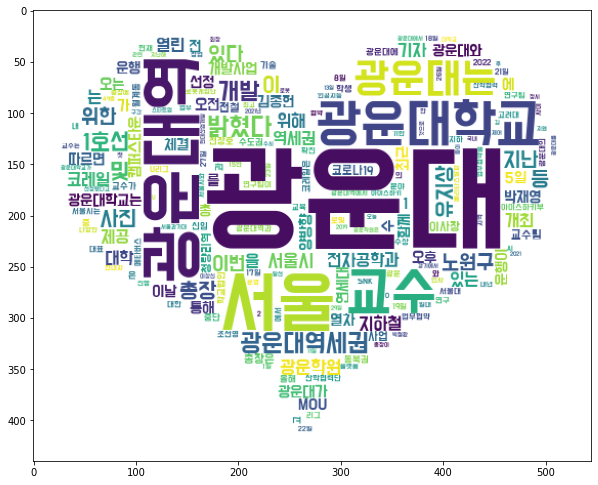

In [109]:
plt.figure(figsize = (10, 10))
wc = WordCloud(font_path = "/content/BMDOHYEON_ttf.ttf", background_color = 'white',
               mask = img)
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [106]:
from PIL import Image

In [108]:
# 픽셀값 0~255 // 0에 가까울수록 검은색, 255에 가까울수록 흰색
import numpy as np

img = Image.open("하트.png")
img = np.array(img) # 행렬
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]